### **Аналитическое решение линейной регрессии**  

Линейная регрессия — это метод машинного обучения, который моделирует зависимость между независимыми переменными (**признаками**) и зависимой переменной (**целевым значением**) с помощью линейного уравнения.  

#### **Формальная постановка задачи**  
Дано:  
- Матрица признаков $ X \in \mathbb{R}^{n \times m}$ $ n $ — число объектов, \( m \) — число признаков).  
- Вектор целевых значений $ y \in \mathbb{R}^{n} $.  

**Цель:** найти вектор весов $ w \in \mathbb{R}^{m} $, минимизирующий среднеквадратичную ошибку (MSE):  
$$\min_w \| Xw - y \|^2$$


---


<h3><b> Формула нахождения псевдорешения</b></h3>

$$ w = (X^{T} * X) ^ {-1} * X^{T} * y$$

Уравнение регрессии: y = 44.44x + 1.17


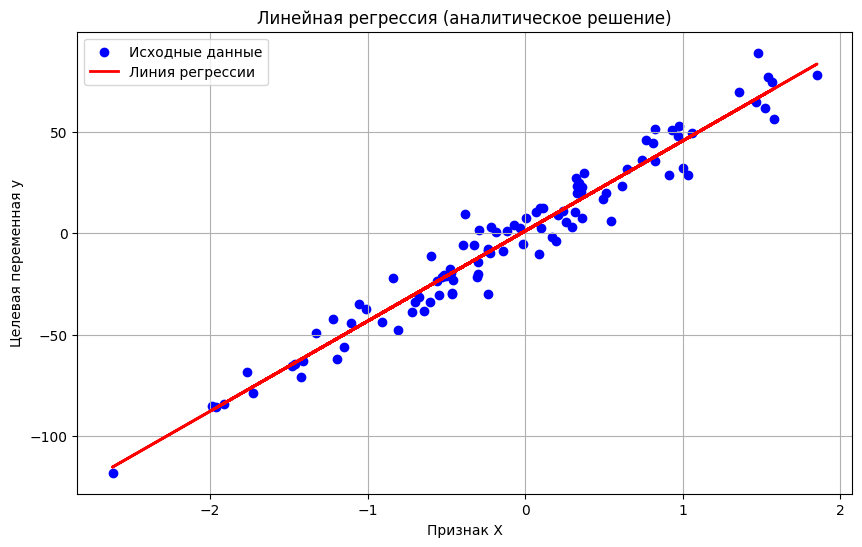

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Аналитическое решение (нормальное уравнение)
        (bias | weights) = (XᵀX)⁻¹Xᵀy
        """
        # Добавляем столбец единиц для свободного члена
        X = np.c_[np.ones(X.shape[0]), X]

        # Вычисляем параметры по нормальному уравнению
        theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

        self.bias = theta[0]  # свободный член
        self.weights = theta[1:]  # коэффициенты при признаках

    def predict(self, X):
        """Предсказание значений"""
        return X.dot(self.weights) + self.bias

    def get_params(self):
        """Возвращает параметры модели"""
        return {'weights': self.weights, 'bias': self.bias}

# 1. Генерация синтетических данных
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# 3. Получение параметров модели
params = model.get_params()
print(f"Уравнение регрессии: y = {params['weights'][0]:.2f}x + {params['bias']:.2f}")

# 4. Предсказания
predictions = model.predict(X)

# 5. Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X, predictions, color='red', linewidth=2, label='Линия регрессии')
plt.title('Линейная регрессия (аналитическое решение)')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid(True)
plt.show()